In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def compute_pca(data):
    centered_data = data - np.mean(data, axis=0)
    cov_matrix = np.cov(centered_data.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    # First two principal components
    return sorted_eigenvectors[:, :2]



def plot_data(data, pcas, title):
    plt.scatter(data[:, 0], data[:, 1], label='Points')
    origin = [0, 0] 
    plt.quiver(*origin, pcas[0, 0], pcas[0, 1], color='r', scale=3, scale_units='xy', angles='xy', label='PC1')
    plt.quiver(*origin, pcas[1, 0], pcas[1, 1], color='g', scale=3, scale_units='xy', angles='xy', label='PC2')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.axis('equal')
    plt.show()

In [63]:
def points_in_circle(center, radius, num_points):
    points = []
    while len(points) < num_points:
        point = np.random.uniform(-radius, radius, 2)
        if np.linalg.norm(point - center) <= radius:
            points.append(point)
    return np.array(points)



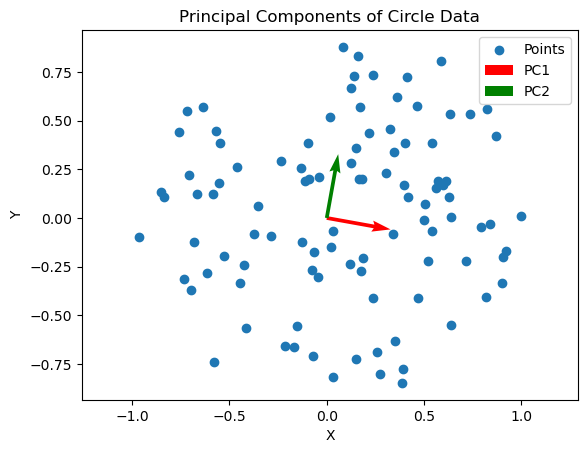

In [64]:
num_points = 100
points_circle = points_in_circle(np.array([0, 0]), 1, num_points)
pca_circle = compute_pca(points_circle)
plot_data(points_circle , pca_circle, 'Principal Components of Circle Data')

### First and second are orthogonal (as we have learnt in class). However, this one is actually not very obvious why they are first and second as the data are quite random in circle

In [65]:
def points_in_ellipse(center, major_axis, minor_axis, num_points):
    points = []
    while len(points) < num_points:
        point = np.random.uniform(-major_axis, major_axis, 2)
        if (point[0]**2 / major_axis**2) + (point[1]**2 / minor_axis**2) <= 1:
            points.append(point)
    return np.array(points)

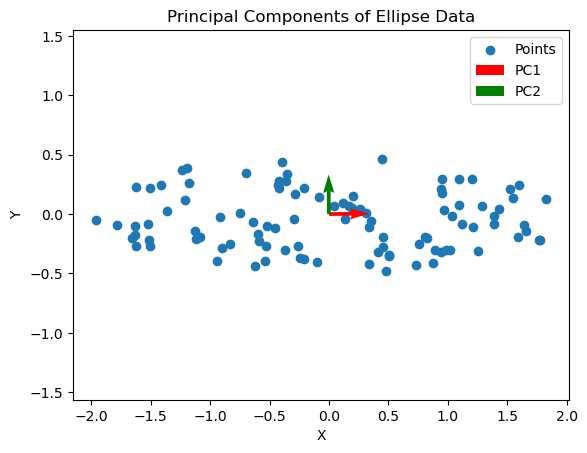

In [66]:
num_points = 100
points_ellipse = points_in_ellipse(np.array([0, 0]), 2, 0.5, num_points)
pca_ellipse = compute_pca(points_ellipse)
plot_data(points_ellipse, pca_ellipse, 'Principal Components of Ellipse Data')

### Also orthogonal, this one is more obvious why they are first and second (best and second best)